In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir =  "Datasets/cifar10_dataset"

In [3]:
datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

In [4]:
train_data= datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

Found 48000 images belonging to 10 classes.


In [5]:
val_data= datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 10 classes.


In [8]:
from tensorflow.keras import models, layers, optimizers
model=models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_data, epochs=10, validation_data=val_data)

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.2290 - loss: 2.1068

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 264ms/step - accuracy: 0.2291 - loss: 2.1066 - val_accuracy: 0.3163 - val_loss: 1.8863
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 249ms/step - accuracy: 0.3093 - loss: 1.8982 - val_accuracy: 0.3113 - val_loss: 1.8728
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 171s 228ms/step - accuracy: 0.3344 - loss: 1.8373 - val_accuracy: 0.3311 - val_loss: 1.8332
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 254ms/step - accuracy: 0.3484 - loss: 1.8043 - val_accuracy: 0.3422 - val_loss: 1.8203
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 204s 257ms/step - accuracy: 0.3624 - loss: 1.7681 - val_accuracy: 0.3733 - val_loss: 1.7411
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 175s 234ms/step - accuracy: 0.3713 - loss: 1.7453 - val_accuracy: 0.3622 - val_loss: 1.7619
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 182s 243ms/step - accuracy: 0.3719 - loss: 1.7362 - val_accuracy: 0.3808 - val_loss: 1.7236
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 196s 234ms/step - accuracy: 0.3794 - loss: 1.70

Text(0.5, 0, 'Epoch')

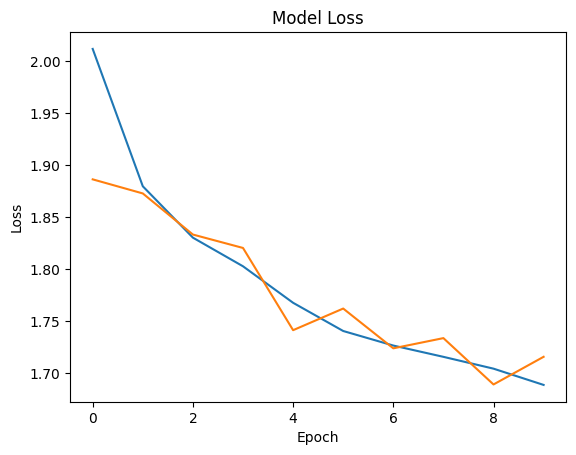

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

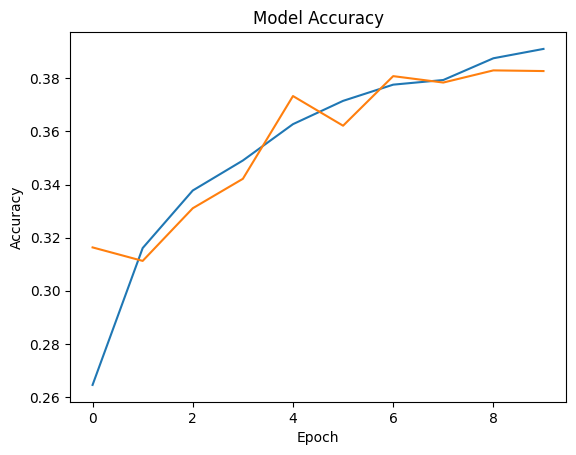

In [45]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [46]:
class_label= list(train_data.class_indices.keys())

In [47]:
class_label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [48]:
x_batch, y_batch=next(val_data)

In [49]:
pred=model.predict(x_batch)
pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 


array([[2.55357996e-02, 1.32812396e-01, 1.85846403e-01, 1.46569788e-01,
        9.14461911e-02, 2.31706098e-01, 4.04864363e-02, 1.13645136e-01,
        8.46106000e-03, 2.34906655e-02],
       [4.51396704e-02, 3.69662315e-01, 5.20487130e-02, 4.18792777e-02,
        3.54148075e-02, 2.26814002e-02, 3.85818630e-02, 2.45161839e-02,
        9.88601968e-02, 2.71215558e-01],
       [8.22423324e-02, 1.99203297e-01, 2.06562150e-02, 5.20014949e-03,
        6.36304123e-03, 6.93116942e-03, 2.38914348e-04, 5.94257303e-02,
        3.96858761e-03, 6.15770578e-01],
       [2.81721441e-04, 3.44657863e-04, 1.00839464e-02, 1.03295751e-01,
        8.81506479e-04, 8.01584065e-01, 3.25143599e-04, 6.72387406e-02,
        1.76864603e-04, 1.57875214e-02],
       [5.11230761e-03, 3.25708557e-03, 9.67181548e-02, 9.72714573e-02,
        2.17043951e-01, 1.33464396e-01, 2.58473039e-01, 1.76406220e-01,
        2.11430946e-03, 1.01390649e-02],
       [1.78754464e-01, 2.45634332e-01, 7.63271749e-02, 3.61513160e-02,
   

In [53]:
'''from tensorflow.keras.preprocessing import image
def display_predict(img_path, actual_label):
    img=image.load_img(img_path, target_size=(32,32))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array, axis=0)

    pred=model.predict(img_array)
    pred=np.argmax(pred)

    pred_class=class_names[pred]
  

    plt.imshow(img)
    plt.title(f"Predicted: {pred_class} , Actual: {actual_label}")

display_predict("Datasets/cifar10_dataset/3/image_21.png", "cat")'''
    

'from tensorflow.keras.preprocessing import image\ndef display_predict(img_path, actual_label):\n    img=image.load_img(img_path, target_size=(32,32))\n    img_array=image.img_to_array(img)\n    img_array=np.expand_dims(img_array, axis=0)\n\n    pred=model.predict(img_array)\n    pred=np.argmax(pred)\n\n    pred_class=class_names[pred]\n  \n\n    plt.imshow(img)\n    plt.title(f"Predicted: {pred_class} , Actual: {actual_label}")\n\ndisplay_predict("Datasets/cifar10_dataset/3/image_21.png", "cat")'

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/flatten_1_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\namya\AppData\Local\Temp\ipykernel_25800\234252031.py", line 9, in <module>

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 510, in predict

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\sequential.py", line 213, in call

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py", line 584, in call

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py", line 54, in call

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\ops\numpy.py", line 4728, in reshape

  File "C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\numpy.py", line 1851, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1_1/flatten_1_1/Reshape}}]] [Op:__inference_one_step_on_data_distributed_111238]

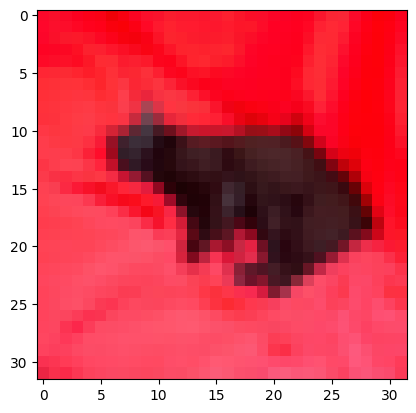

In [43]:
img='Datasets/cifar10_dataset/3/image_21.png'
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
img= load_img(img, target_size=(32,32))
img_array= image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
plt.imshow(img)

pred=model.predict(img_array)